In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

## Q1

In [2]:
df = pd.read_csv('german_credit_data.csv')

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


## Q2

In [4]:
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [5]:
df.tail(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
990,990,37,male,1,own,NaN,NaN,3565,12,education,good
991,991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
992,992,23,male,1,rent,NaN,little,1936,18,radio/TV,good
993,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
994,994,50,male,2,own,NaN,NaN,2390,12,car,good
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [6]:
df.sample(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
896,896,28,female,3,rent,little,little,2606,21,radio/TV,good
793,793,51,male,2,free,little,rich,2892,24,furniture/equipment,good
381,381,38,female,3,free,little,moderate,12976,18,car,bad
322,322,34,male,3,free,little,little,2910,24,car,good
167,167,20,female,2,own,rich,moderate,1577,11,furniture/equipment,good
944,944,46,female,2,rent,little,little,1845,15,furniture/equipment,good
191,191,34,male,1,free,moderate,moderate,3844,48,business,bad
939,939,46,male,3,own,NaN,NaN,6842,24,car,good
566,566,36,male,2,own,little,little,1372,12,car,bad
462,462,34,female,3,rent,little,moderate,3017,12,furniture/equipment,good


## Q3

In [7]:
df=df.drop('Unnamed: 0',axis=1)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [8]:
df = df.fillna('unknown')
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,unknown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,unknown,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [9]:
df_real=pd.get_dummies(df.drop('Risk',axis=1),drop_first=True)
df_real

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Checking account_moderate,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
996,40,3,3857,30,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
997,38,2,804,12,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
998,23,2,1845,45,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df_real['Risk']=df['Risk'].replace(['good','bad'],[1,0])

In [11]:
df_real

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,67,2,1169,6,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,22,2,5951,48,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,49,1,2096,12,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,45,2,7882,42,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
996,40,3,3857,30,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
997,38,2,804,12,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
998,23,2,1845,45,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Q4

In [12]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Sex_male                     1000 non-null   uint8
 5   Housing_own                  1000 non-null   uint8
 6   Housing_rent                 1000 non-null   uint8
 7   Saving accounts_moderate     1000 non-null   uint8
 8   Saving accounts_quite rich   1000 non-null   uint8
 9   Saving accounts_rich         1000 non-null   uint8
 10  Saving accounts_unknown      1000 non-null   uint8
 11  Checking account_moderate    1000 non-null   uint8
 12  Checking account_rich        1000 non-null   uint8
 13  Checking account_unknown     1000 non-null   uint

In [13]:
df_real.describe()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.690000,0.713000,0.179000,0.103000,0.063000,0.048000,...,0.063000,0.394000,0.337000,0.01200,0.059000,0.181000,0.280000,0.022000,0.01200,0.700000
std,11.375469,0.653614,2822.736876,12.058814,0.462725,0.452588,0.383544,0.304111,0.243085,0.213873,...,0.243085,0.488879,0.472921,0.10894,0.235743,0.385211,0.449224,0.146757,0.10894,0.458487
min,19.000000,0.000000,250.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


## Q5

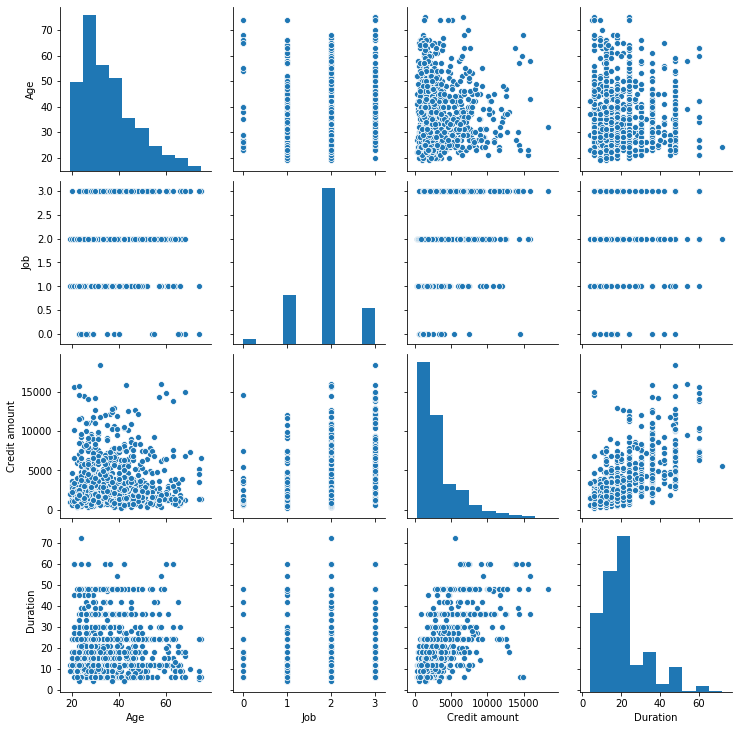

In [14]:
sns.pairplot(df)

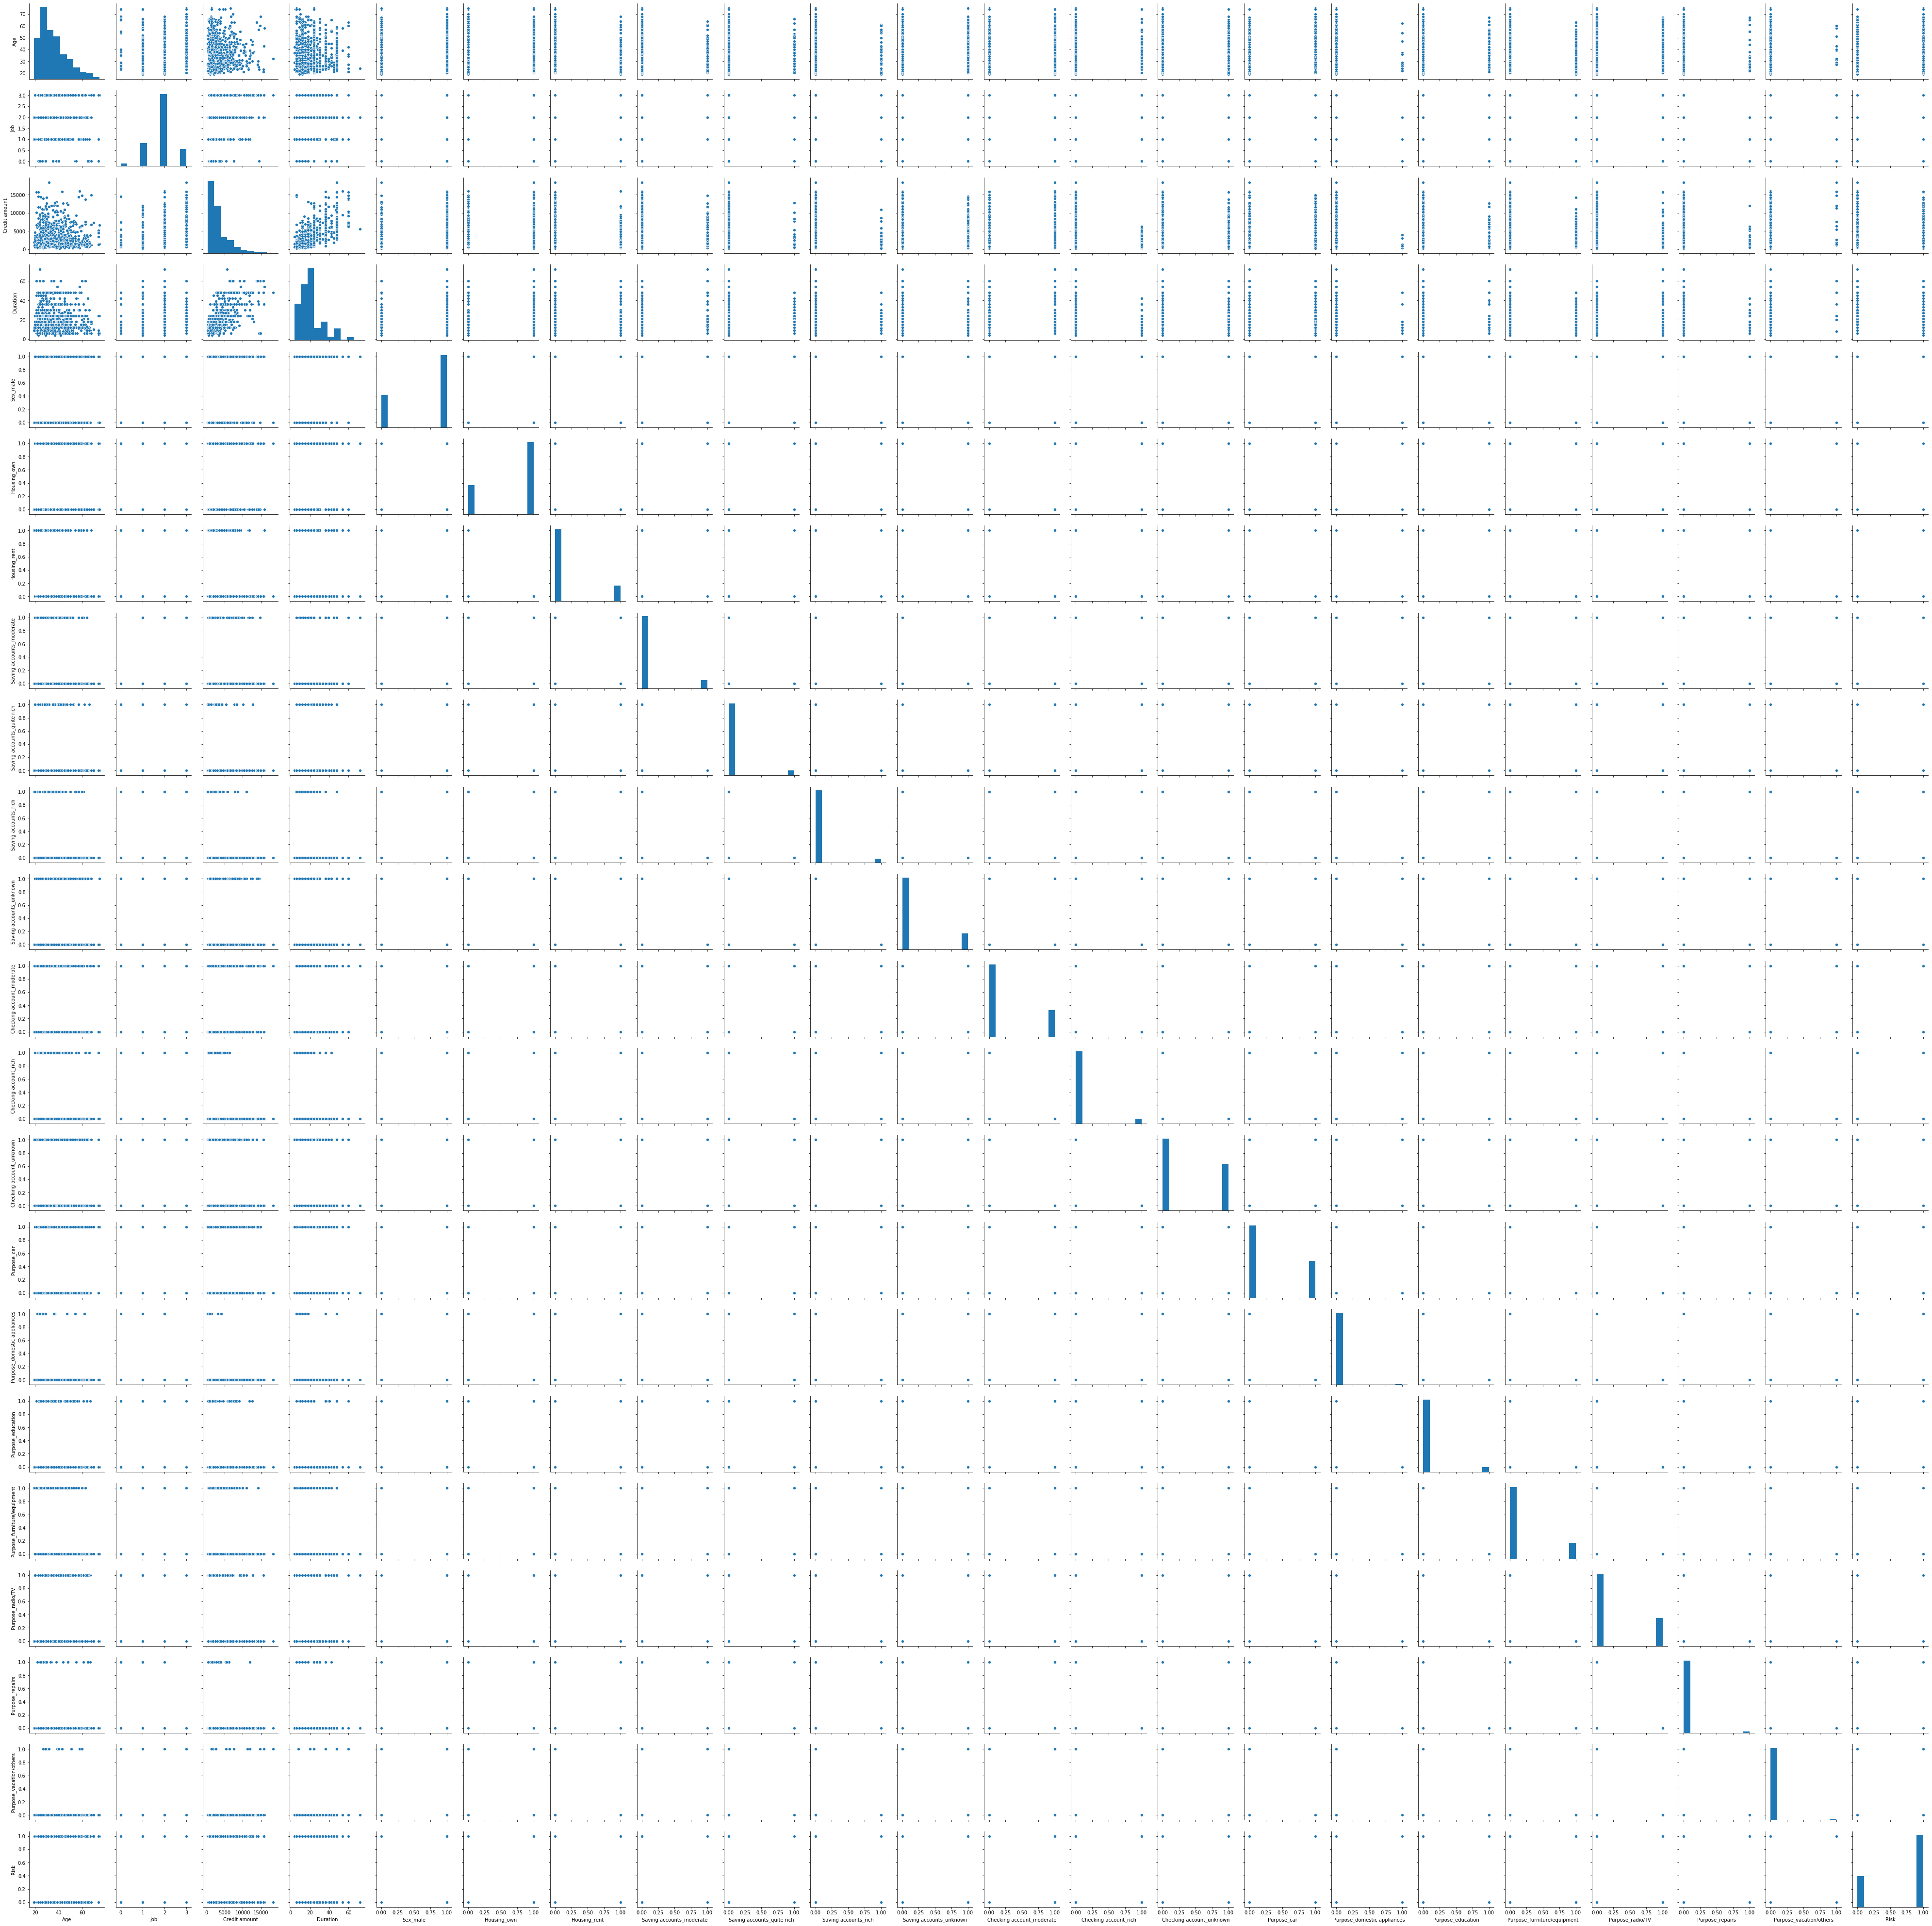

In [15]:
sns.pairplot(df_real)

Text(0.5, 1.0, 'Age')

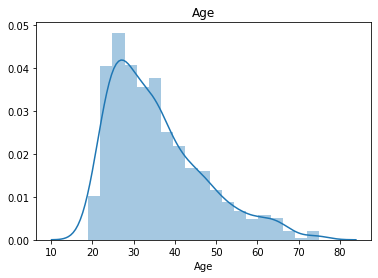

In [16]:
sns.distplot(a=df_real['Age'])
plt.title('Age')


Text(0.5, 1.0, 'Credit amount')

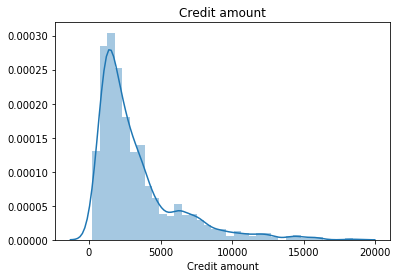

In [17]:
sns.distplot(a=df_real['Credit amount'])
plt.title('Credit amount')

Text(0.5, 1.0, 'Duration')

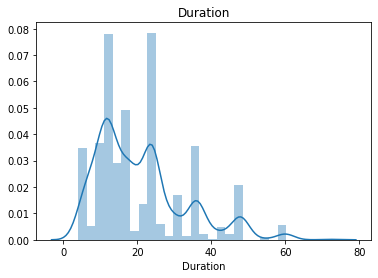

In [18]:
sns.distplot(a=df_real['Duration'])
plt.title('Duration')

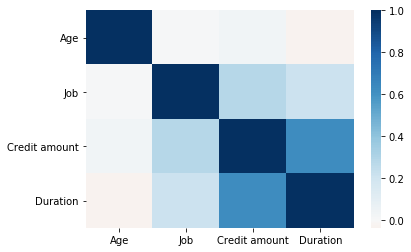

In [19]:
sns.heatmap(df.corr(),cmap='RdBu',center=0)

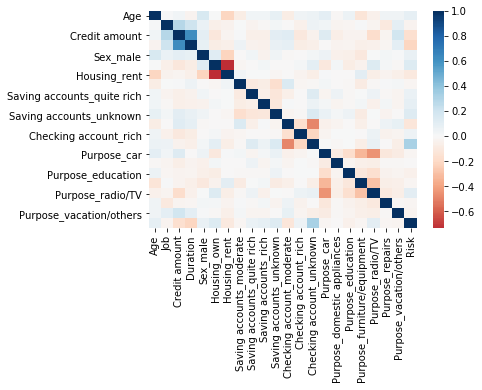

In [20]:
sns.heatmap(df_real.corr(),cmap='RdBu',center=0)

## Q8

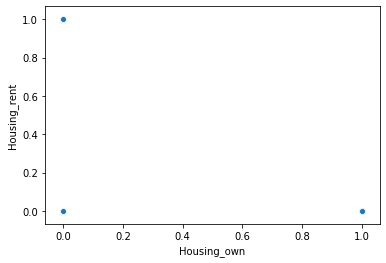

In [21]:
sns.scatterplot(x='Housing_own',y='Housing_rent',data=df_real)

## Q9

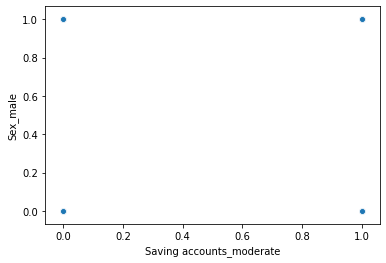

In [22]:
sns.scatterplot(x='Saving accounts_moderate',y='Sex_male',data=df_real)


## Q10

(array([ 22.,   0.,   0., 200.,   0.,   0., 630.,   0.,   0., 148.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

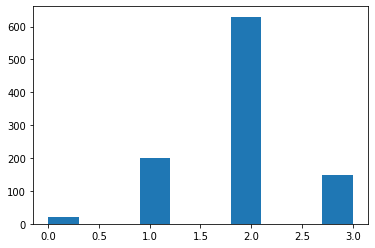

In [23]:
plt.hist(data=df, x="Job")

## Q11

Text(0.5, 1.0, 'Duration')

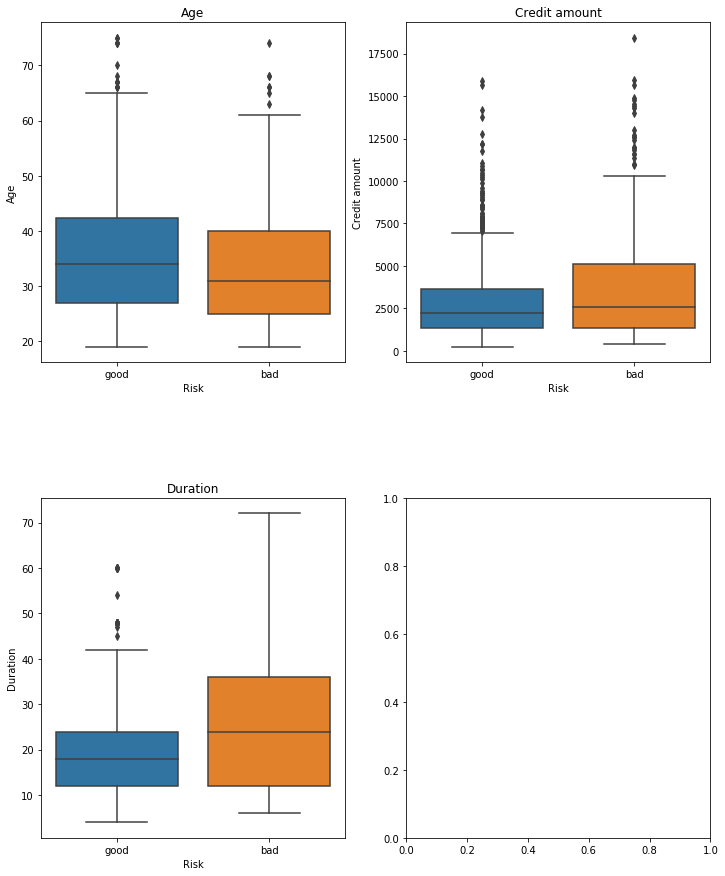

In [24]:
fig, axs = plt.subplots(2, 2,figsize=(12, 15),gridspec_kw={'hspace':0.4, 'wspace': 0.2})
sns.boxplot(ax=axs[0,0],x='Risk', y='Age', data=df)
axs[0, 0].set_title('Age')
sns.boxplot(ax=axs[0,1],x='Risk', y='Credit amount', data=df)
axs[0, 1].set_title('Credit amount')
sns.boxplot(ax=axs[1,0],x='Risk', y='Duration', data=df)
axs[1, 0].set_title('Duration')

## Q12

In [25]:
X_train, X_test, y_train, y_test=train_test_split(df_real,df['Risk'], test_size=0.3,random_state=99)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 22)
(300, 22)
(700,)
(300,)


## Q13

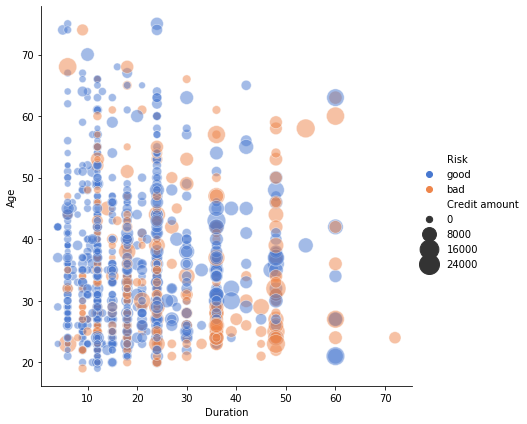

In [27]:
sns.relplot(x="Duration", y="Age", hue="Risk", size="Credit amount",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

## Q14

from Q15 default seem to be better than normalized data or standardized data

## Q15 & Q16

#### 1. Default

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf15_1=RandomForestClassifier()

In [29]:
x=df_real.drop(['Risk'],axis=1)
y=df_real['Risk']

In [30]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=99)

In [31]:
rf15_1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
predicted15_1 =rf15_1.predict(x_test)

In [33]:
confusion_matrix(y_test,predicted15_1)

array([[ 26,  48],
       [ 18, 158]], dtype=int64)

In [34]:
print('Accuracy=',accuracy_score(y_test,predicted15_1))
print('F1 score=',f1_score(y_test,predicted15_1))
print('Precision=',precision_score(y_test,predicted15_1))
print('Recall=',recall_score(y_test,predicted15_1))

Accuracy= 0.736
F1 score= 0.8272251308900525
Precision= 0.7669902912621359
Recall= 0.8977272727272727


In [35]:
default_acc=accuracy_score(y_test,predicted15_1)
default_f1=f1_score(y_test,predicted15_1)
default_pre=precision_score(y_test,predicted15_1)
default_recall=recall_score(y_test,predicted15_1)

#### 2. Normalize

In [36]:
rf15_2=RandomForestClassifier()

In [37]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=99)

In [38]:
min_max_scaler = MinMaxScaler()

In [39]:
x_train= min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)


In [40]:
x_train= pd.DataFrame(x_train,columns=df_real.drop('Risk',axis=1).columns)
x_test= pd.DataFrame(x_test,columns=df_real.drop('Risk',axis=1).columns)


In [41]:
rf15_2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
predicted15_2 =rf15_2.predict(x_test)

In [43]:
confusion_matrix(y_test,predicted15_2)

array([[ 30,  44],
       [ 25, 151]], dtype=int64)

In [44]:
print('Accuracy=',accuracy_score(y_test,predicted15_2))
print('F1 score=',f1_score(y_test,predicted15_2))
print('Precision=',precision_score(y_test,predicted15_2))
print('Recall=',recall_score(y_test,predicted15_2))

Accuracy= 0.724
F1 score= 0.8140161725067386
Precision= 0.7743589743589744
Recall= 0.8579545454545454


In [45]:
norm_acc=accuracy_score(y_test,predicted15_2)
norm_f1=f1_score(y_test,predicted15_2)
norm_pre=precision_score(y_test,predicted15_2)
norm_recall=recall_score(y_test,predicted15_2)

#### 3. Standardize

In [46]:
rf15_3=RandomForestClassifier()

In [47]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=99)

In [48]:
sc =StandardScaler()

In [49]:
x_train= sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [50]:
x_train= pd.DataFrame(x_train,columns=df_real.drop('Risk',axis=1).columns)
x_test= pd.DataFrame(x_test,columns=df_real.drop('Risk',axis=1).columns)

In [51]:
rf15_3.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
predicted15_3= rf15_3.predict(x_test)

In [53]:
confusion_matrix(y_test,predicted15_3)

array([[ 27,  47],
       [ 18, 158]], dtype=int64)

In [54]:
print('Accuracy=',accuracy_score(y_test,predicted15_3))
print('F1 score=',f1_score(y_test,predicted15_3))
print('Precision=',precision_score(y_test,predicted15_3))
print('Recall=',recall_score(y_test,predicted15_3))

Accuracy= 0.74
F1 score= 0.8293963254593175
Precision= 0.7707317073170732
Recall= 0.8977272727272727


In [55]:
sc_acc=accuracy_score(y_test,predicted15_3)
sc_f1=f1_score(y_test,predicted15_3)
sc_pre=precision_score(y_test,predicted15_3)
sc_recall=recall_score(y_test,predicted15_3)

In [56]:
print('Accuracy=',default_acc)
print('F1 score=',default_f1)
print('Precision=',default_pre)
print('Recall=',default_recall)

print('Accuracy=',norm_acc)
print('F1 score=',norm_f1)
print('Precision=',norm_pre)
print('Recall=',norm_recall)

print('Accuracy=',sc_acc)
print('F1 score=',sc_f1)
print('Precision=',sc_pre)
print('Recall=',sc_recall)

Accuracy= 0.736
F1 score= 0.8272251308900525
Precision= 0.7669902912621359
Recall= 0.8977272727272727
Accuracy= 0.724
F1 score= 0.8140161725067386
Precision= 0.7743589743589744
Recall= 0.8579545454545454
Accuracy= 0.74
F1 score= 0.8293963254593175
Precision= 0.7707317073170732
Recall= 0.8977272727272727


## Q17

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_combination = { 'max_depth' : [2,4,8,16,32,64,'none'],
                      'min_samples_leaf': [1,2,4,8,16,32],
                      'n_estimators': [10,20,50,100,500]}

In [59]:
grid_search=GridSearchCV(RandomForestClassifier(),param_combination,verbose=2)

In [60]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=99)

In [61]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_de

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=50 ................
[CV] .

[CV]  max_depth=2, min_samples_leaf=4, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=4, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=4, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=4, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=4, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=4, n_estimators=500 ...............
[CV]  max_depth=2, min_samples_leaf=4, n_estimators=500, total=   0.5s
[CV] max_depth=2, min_samples_leaf=4, n_estimators=500 ...............
[CV]  max_depth=2, min_samples_leaf=4, n_estimators=500, total=   0.5s
[CV] max_depth=2, min_samples_leaf=4, n_estimators=500 ...............
[CV]  

[CV]  max_depth=2, min_samples_leaf=16, n_estimators=500, total=   0.5s
[CV] max_depth=2, min_samples_leaf=16, n_estimators=500 ..............
[CV]  max_depth=2, min_samples_leaf=16, n_estimators=500, total=   0.5s
[CV] max_depth=2, min_samples_leaf=32, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=32, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=32, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=32, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=32, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=32, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, n_estimators=20 ...............
[CV]

[CV] . max_depth=4, min_samples_leaf=2, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=2, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=2, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=2, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=2, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=2, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=2, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=100 ...............
[CV]  

[CV]  max_depth=4, min_samples_leaf=8, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=8, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=8, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=8, n_estimators=500 ...............
[CV]  max_depth=4, min_samples_leaf=8, n_estimators=500, total=   0.5s
[CV] max_depth=4, min_samples_leaf=8, n_estimators=500 ...............
[CV]  max_depth=4, min_samples_leaf=8, n_estimators=500, total=   0.5s
[CV] max_depth=4, min_samples_leaf=8, n_estimators=500 ...............
[CV]  max_depth=4, min_samples_leaf=8, n_estimators=500, total=   0.5s
[CV] max_depth=4, min_samples_leaf=8, n_estimators=500 ...............
[CV]  max_depth=4, min_samples_leaf=8, n_estimators=500, total=   0.5s
[CV] max_depth=4, min_samples_leaf=8, n_estimators=500 ...............
[CV]  max_depth=4, min_samples_leaf=8, n_estimators=500, total=   0.5s
[CV] max_depth=4, min_samples_leaf=16, n_estimators=10 ...............
[CV]  

[CV] . max_depth=8, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=100 ...............
[CV]  max_depth=8, min_samples_leaf=1, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=100 ...............
[CV]  

[CV]  max_depth=8, min_samples_leaf=4, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=8, min_samples_leaf=4, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=500 ...............
[CV]  max_depth=8, min_samples_leaf=4, n_estimators=500, total=   0.6s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=500 ...............
[CV]  max_depth=8, min_samples_leaf=4, n_estimators=500, total=   0.6s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=500 ...............
[CV]  max_depth=8, min_samples_leaf=4, n_estimators=500, total=   0.5s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=500 ...............
[CV]  max_depth=8, min_samples_leaf=4, n_estimators=500, total=   0.5s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=500 ...............
[CV]  max_depth=8, min_samples_leaf=4, n_estimators=500, total=   0.5s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=10 ................
[CV] .

[CV]  max_depth=8, min_samples_leaf=32, n_estimators=50, total=   0.1s
[CV] max_depth=8, min_samples_leaf=32, n_estimators=50 ...............
[CV]  max_depth=8, min_samples_leaf=32, n_estimators=50, total=   0.1s
[CV] max_depth=8, min_samples_leaf=32, n_estimators=50 ...............
[CV]  max_depth=8, min_samples_leaf=32, n_estimators=50, total=   0.1s
[CV] max_depth=8, min_samples_leaf=32, n_estimators=50 ...............
[CV]  max_depth=8, min_samples_leaf=32, n_estimators=50, total=   0.1s
[CV] max_depth=8, min_samples_leaf=32, n_estimators=50 ...............
[CV]  max_depth=8, min_samples_leaf=32, n_estimators=50, total=   0.1s
[CV] max_depth=8, min_samples_leaf=32, n_estimators=100 ..............
[CV]  max_depth=8, min_samples_leaf=32, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=32, n_estimators=100 ..............
[CV]  max_depth=8, min_samples_leaf=32, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=32, n_estimators=100 ..............
[CV]

[CV]  max_depth=16, min_samples_leaf=2, n_estimators=100, total=   0.1s
[CV] max_depth=16, min_samples_leaf=2, n_estimators=100 ..............
[CV]  max_depth=16, min_samples_leaf=2, n_estimators=100, total=   0.1s
[CV] max_depth=16, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=16, min_samples_leaf=2, n_estimators=500, total=   0.6s
[CV] max_depth=16, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=16, min_samples_leaf=2, n_estimators=500, total=   0.6s
[CV] max_depth=16, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=16, min_samples_leaf=2, n_estimators=500, total=   0.6s
[CV] max_depth=16, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=16, min_samples_leaf=2, n_estimators=500, total=   0.6s
[CV] max_depth=16, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=16, min_samples_leaf=2, n_estimators=500, total=   0.6s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=10 ...............

[CV]  max_depth=16, min_samples_leaf=16, n_estimators=50, total=   0.1s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=50, total=   0.1s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=50, total=   0.1s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=50, total=   0.1s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=50, total=   0.1s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=100 .............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=100, total=   0.1s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=100 .............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=100, total=   0.1s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=100 ...........

[CV]  max_depth=32, min_samples_leaf=1, n_estimators=100, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=100 ..............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=100, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=500 ..............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=500, total=   0.6s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=500 ..............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=500, total=   0.6s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=500 ..............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=500, total=   0.6s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=500 ..............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=500, total=   0.6s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=500 ..............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=500, total=   0.6s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=10 ...............

[CV]  max_depth=32, min_samples_leaf=8, n_estimators=20, total=   0.0s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=100 ..............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=100, total=   0.1s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=100 ..............
[CV] 

[CV]  max_depth=32, min_samples_leaf=32, n_estimators=100, total=   0.1s
[CV] max_depth=32, min_samples_leaf=32, n_estimators=100 .............
[CV]  max_depth=32, min_samples_leaf=32, n_estimators=100, total=   0.1s
[CV] max_depth=32, min_samples_leaf=32, n_estimators=500 .............
[CV]  max_depth=32, min_samples_leaf=32, n_estimators=500, total=   0.5s
[CV] max_depth=32, min_samples_leaf=32, n_estimators=500 .............
[CV]  max_depth=32, min_samples_leaf=32, n_estimators=500, total=   0.5s
[CV] max_depth=32, min_samples_leaf=32, n_estimators=500 .............
[CV]  max_depth=32, min_samples_leaf=32, n_estimators=500, total=   0.5s
[CV] max_depth=32, min_samples_leaf=32, n_estimators=500 .............
[CV]  max_depth=32, min_samples_leaf=32, n_estimators=500, total=   0.5s
[CV] max_depth=32, min_samples_leaf=32, n_estimators=500 .............
[CV]  max_depth=32, min_samples_leaf=32, n_estimators=500, total=   0.5s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=10 ........

[CV]  max_depth=64, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=100 ..............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=100, total=   0.1s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=100 ..............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=100, total=   0.1s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=100 ..............
[CV]

[CV]  max_depth=64, min_samples_leaf=16, n_estimators=100, total=   0.1s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=100 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=100, total=   0.1s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=500, total=   0.5s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=500, total=   0.5s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=500, total=   0.5s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=500, total=   0.5s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=500, total=   0.5s
[CV] max_depth=64, min_samples_leaf=32, n_estimators=10 .......

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

[CV]  max_depth=none, min_samples_leaf=1, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=1, n_estimators=100 ............
[CV]  max_depth=none, min_samples_leaf=1, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=1, n_estimators=100 ............
[CV]  max_depth=none, min_samples_leaf=1, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=1, n_estimators=100 ............
[CV]  max_depth=none, min_samples_leaf=1, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=1, n_estimators=500 ............


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=none, min_samples_leaf=1, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=1, n_estimators=500 ............
[CV]  max_depth=none, min_samples_leaf=1, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=1, n_estimators=500 ............


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=none, min_samples_leaf=1, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=1, n_estimators=500 ............
[CV]  max_depth=none, min_samples_leaf=1, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=1, n_estimators=500 ............


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

[CV]  max_depth=none, min_samples_leaf=1, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=20 .............
[CV]  max_depth=none, min_samples_leaf=2, n_estimators=20, total=   0.0s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=20 .....

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

[CV]  max_depth=none, min_samples_leaf=2, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=100 ............
[CV]  max_depth=none, min_samples_leaf=2, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=100 ............
[CV]  max_depth=none, min_samples_leaf=2, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=500 ............


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=none, min_samples_leaf=2, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=500 ............
[CV]  max_depth=none, min_samples_leaf=2, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=500 ............


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=none, min_samples_leaf=2, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=500 ............
[CV]  max_depth=none, min_samples_leaf=2, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=2, n_estimators=500 ............


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

[CV]  max_depth=none, min_samples_leaf=2, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=20 .............
[CV]  max_depth=none, min_samples_leaf=4, n_estimators=20, total=   0.0s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=20 .....

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

[CV]  max_depth=none, min_samples_leaf=4, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=100 ............
[CV]  max_depth=none, min_samples_leaf=4, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=100 ............
[CV]  max_depth=none, min_samples_leaf=4, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=100 ............
[CV]  max_depth=none, min_samples_leaf=4, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=500 ............


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=none, min_samples_leaf=4, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=500 ............
[CV]  max_depth=none, min_samples_leaf=4, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=500 ............


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=none, min_samples_leaf=4, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=500 ............
[CV]  max_depth=none, min_samples_leaf=4, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=4, n_estimators=500 ............


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

[CV]  max_depth=none, min_samples_leaf=4, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=10 .............
[CV]  max_depth=none, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=20 .............
[CV]  max_depth=none, min_samples_leaf=8, n_estimators=20, total=   0.0s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=20 .....

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

[CV]  max_depth=none, min_samples_leaf=8, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=100 ............
[CV]  max_depth=none, min_samples_leaf=8, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=100 ............
[CV]  max_depth=none, min_samples_leaf=8, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=500 ............
[CV]  max_depth=none, min_samples_leaf=8, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=500 ............


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

[CV]  max_depth=none, min_samples_leaf=8, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=500 ............
[CV]  max_depth=none, min_samples_leaf=8, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=500 ............


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

[CV]  max_depth=none, min_samples_leaf=8, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=8, n_estimators=500 ............
[CV]  max_depth=none, min_samples_leaf=8, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=10 ............
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=10 ............
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=10 ............
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=10 ............
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=10 ............
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=2

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

[CV]  max_depth=none, min_samples_leaf=16, n_estimators=20, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=50 ............
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=50, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=50 ............
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=50, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=50 ............
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=50, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=50 ............
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=50, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=50 ............
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=50, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=100 ...........
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=none, min_samples_leaf=16, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=500 ...........
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=500 ...........


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=none, min_samples_leaf=16, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=500 ...........
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=500 ...........


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

[CV]  max_depth=none, min_samples_leaf=16, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=16, n_estimators=500 ...........
[CV]  max_depth=none, min_samples_leaf=16, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=10 ............
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=10 ............
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=10 ............
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=10 ............
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=10 ............
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=10, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

[CV]  max_depth=none, min_samples_leaf=32, n_estimators=20, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=50 ............
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=50, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=50 ............
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=50, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=50 ............
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=50, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=50 ............
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=50, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=50 ............
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=50, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=100 ...........
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=none, min_samples_leaf=32, n_estimators=100, total=   0.0s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=500 ...........
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=500 ...........


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=none, min_samples_leaf=32, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=500 ...........
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=500 ...........
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=500, total=   0.1s
[CV] max_depth=none, min_samples_leaf=32, n_estimators=500 ...........
[CV]  max_depth=none, min_samples_leaf=32, n_estimators=500, total=   0.1s


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed:  2.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [62]:
grid_search.best_params_

{'max_depth': 16, 'min_samples_leaf': 4, 'n_estimators': 50}

In [63]:
grid_predicted=grid_search.predict(x_test)

In [64]:
confusion_matrix(y_test,grid_predicted)

array([[ 21,  53],
       [ 11, 165]], dtype=int64)

In [65]:
print('Accuracy=',accuracy_score(y_test,grid_predicted))
print('F1 score=',f1_score(y_test,grid_predicted))
print('Precision=',precision_score(y_test,grid_predicted))
print('Recall=',recall_score(y_test,grid_predicted))

Accuracy= 0.744
F1 score= 0.8375634517766498
Precision= 0.7568807339449541
Recall= 0.9375


In [66]:
grid_acc=accuracy_score(y_test,grid_predicted)
grid_f1=f1_score(y_test,grid_predicted)
grid_pre=precision_score(y_test,grid_predicted)
grid_recall=recall_score(y_test,grid_predicted)

## Q18

In [67]:
x_2=df_real[['Age','Job','Credit amount','Duration']]
y_2=df_real['Risk']

In [68]:
rf18_1=RandomForestClassifier()

In [69]:
x_train,x_test,y_train,y_test= train_test_split(x_2,y_2,test_size=0.25,random_state=99)

In [70]:
rf18_1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
predicted18_1 =rf18_1.predict(x_test)

In [72]:
confusion_matrix(y_test,predicted18_1)

array([[ 30,  44],
       [ 27, 149]], dtype=int64)

In [73]:
print('Accuracy=',accuracy_score(y_test,predicted18_1))
print('F1 score=',f1_score(y_test,predicted18_1))
print('Precision=',precision_score(y_test,predicted18_1))
print('Recall=',recall_score(y_test,predicted18_1))

Accuracy= 0.716
F1 score= 0.8075880758807588
Precision= 0.772020725388601
Recall= 0.8465909090909091


In [74]:
some_acc=accuracy_score(y_test,predicted18_1)
some_f1=f1_score(y_test,predicted18_1)
some_pre=precision_score(y_test,predicted18_1)
some_recall=recall_score(y_test,predicted18_1)

## Q19

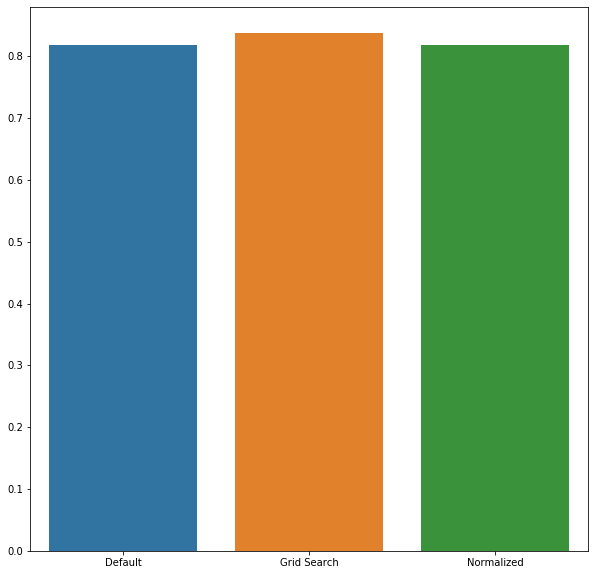

In [75]:
fig=plt.figure(figsize=(10,10))
point=['Default','Grid Search','Normalized']
f1_score=[default_f1,grid_f1,norm_f1]
sns.barplot(x=point, y=f1_score)

## Q20

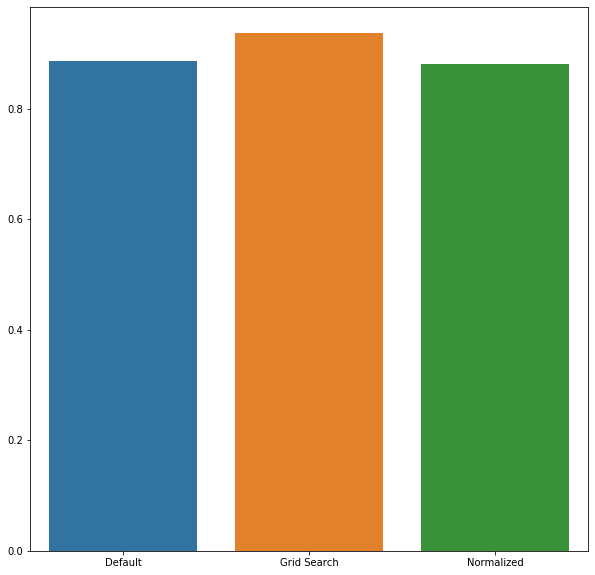

In [76]:
fig=plt.figure(figsize=(10,10))
point=['Default','Grid Search','Normalized']
recall_score=[default_recall,grid_recall,norm_recall]
sns.barplot(x=point, y=recall_score)

## Q21

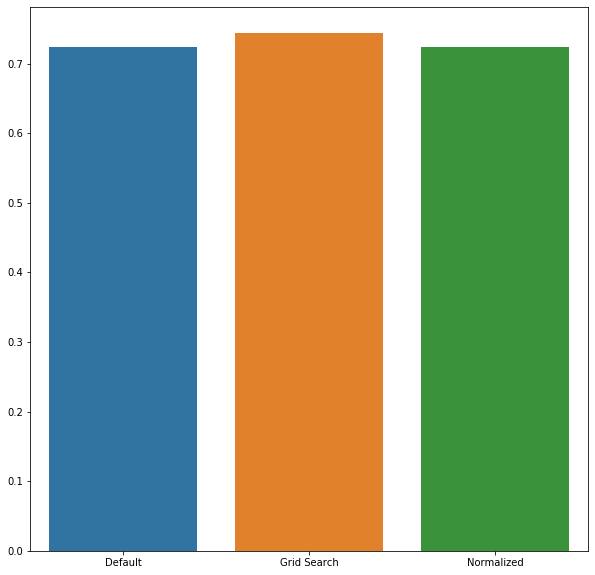

In [77]:
fig=plt.figure(figsize=(10,10))
point=['Default','Grid Search','Normalized']
acc_score=[default_acc,grid_acc,norm_acc]
sns.barplot(x=point, y=acc_score)

## Q22

In [57]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=99)
min_max_scaler22 = MinMaxScaler()

In [58]:
x_train= min_max_scaler22.fit_transform(x_train)
x_test = min_max_scaler22.fit_transform(x_test)

In [59]:
x_train= pd.DataFrame(x_train,columns=df_real.drop('Risk',axis=1).columns)
x_test= pd.DataFrame(x_test,columns=df_real.drop('Risk',axis=1).columns)

In [60]:
param_combination = { 'max_depth' : [2,4,8,16,32,64,'none'],
                      'min_samples_leaf': [1,2,4,8,16,32],
                      'n_estimators': [10,20,50,100,500]}
grid_search22=GridSearchCV(RandomForestClassifier(),param_combination,verbose=1)

In [61]:
grid_search22.fit(x_train,y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\U

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [62]:
grid_search22.best_params_

{'max_depth': 64, 'min_samples_leaf': 2, 'n_estimators': 100}

In [68]:
predicted22=grid_search22.predict(x_test)

In [69]:
confusion_matrix(y_test,predicted22)

array([[ 26,  48],
       [ 16, 160]], dtype=int64)

In [70]:
print('Accuracy=',accuracy_score(y_test,predicted22))
print('F1 score=',f1_score(y_test,predicted22))
print('Precision=',precision_score(y_test,predicted22))
print('Recall=',recall_score(y_test,predicted22))

Accuracy= 0.744
F1 score= 0.8333333333333333
Precision= 0.7692307692307693
Recall= 0.9090909090909091


In [73]:
best_acc=accuracy_score(y_test,predicted22)
best_f1=f1_score(y_test,predicted22)
best_pre=precision_score(y_test,predicted22)
best_recall=recall_score(y_test,predicted22)

## Q23

In [74]:
some_df=df_real[['Age','Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Saving accounts_unknown', 'Checking account_moderate',
       'Checking account_rich', 'Checking account_unknown', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others']]

min_max_scaler23=MinMaxScaler()
df_minmax23=min_max_scaler23.fit_transform(some_df)
df_minmax23

array([[0.85714286, 0.02941176, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.05357143, 0.64705882, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.53571429, 0.11764706, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33928571, 0.11764706, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.07142857, 0.60294118, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.14285714, 0.60294118, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [75]:
norm_some_df=pd.DataFrame(df_minmax23,columns=some_df.columns)
norm_some_df

,Age,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Saving accounts_unknown,Checking account_moderate,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.857143,0.029412,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.053571,0.647059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.535714,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.464286,0.558824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.607143,0.294118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.214286,0.117647,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,0.375000,0.382353,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.339286,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.071429,0.602941,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [76]:
X_train,X_test,y_train,y_test=train_test_split(norm_some_df,
                                              df_real['Risk'],
                                              test_size=0.25,
                                              random_state=99)

In [78]:
from sklearn.tree import DecisionTreeClassifier

param_combination={'max_depth':[4,8,16,32,64], 'min_samples_leaf':[1,2,4,8,16]}
grid_search23=GridSearchCV(DecisionTreeClassifier(),param_combination,verbose=3)
grid_search23.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.707, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.633, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.613, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.687, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.760, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.707, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=16, min_samples_leaf=4 ................................
[CV] .... max_depth=16, min_samples_leaf=4, score=0.640, total=   0.0s
[CV] max_depth=16, min_samples_leaf=4 ................................
[CV] .... max_depth=16, min_samples_leaf=4, score=0.653, total=   0.0s
[CV] max_depth=16, min_samples_leaf=4 ................................
[CV] .... max_depth=16, min_samples_leaf=4, score=0.673, total=   0.0s
[CV] max_depth=16, min_samples_leaf=8 ................................
[CV] .... max_depth=16, min_samples_leaf=8, score=0.667, total=   0.0s
[CV] max_depth=16, min_samples_leaf=8 ................................
[CV] .... max_depth=16, min_samples_leaf=8, score=0.613, total=   0.0s
[CV] max_depth=16, min_samples_leaf=8 ................................
[CV] .... max_depth=16, min_samples_leaf=8, score=0.620, total=   0.0s
[CV] max_depth=16, min_samples_leaf=8 ................................
[CV] .... max_depth=16, min_samples_leaf=8, score=0.707, total=   0.0s
[CV] 

[CV] ... max_depth=64, min_samples_leaf=16, score=0.667, total=   0.0s
[CV] max_depth=64, min_samples_leaf=16 ...............................
[CV] ... max_depth=64, min_samples_leaf=16, score=0.687, total=   0.0s
[CV] max_depth=64, min_samples_leaf=16 ...............................
[CV] ... max_depth=64, min_samples_leaf=16, score=0.753, total=   0.0s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32, 64],
                 

In [79]:
grid_search23.best_params_

{'max_depth': 4, 'min_samples_leaf': 16}

In [80]:
predicted23=grid_search23.predict(X_test)

In [82]:
confusion_matrix(y_test,predicted23)

array([[ 36,  38],
       [ 33, 143]], dtype=int64)

In [83]:
print('Accuracy=',accuracy_score(y_test,predicted23))
print('F1 score=',f1_score(y_test,predicted23))
print('Precision=',precision_score(y_test,predicted23))
print('Recall=',recall_score(y_test,predicted23))

Accuracy= 0.716
F1 score= 0.8011204481792719
Precision= 0.7900552486187845
Recall= 0.8125


In [84]:
tree_acc=accuracy_score(y_test,predicted23)
tree_f1=f1_score(y_test,predicted23)
tree_pre=precision_score(y_test,predicted23)
tree_recall=recall_score(y_test,predicted23)

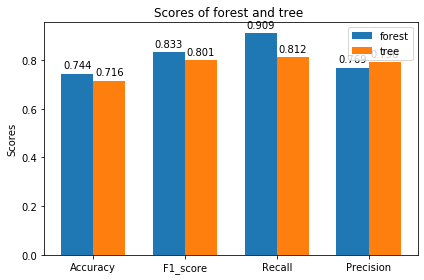

In [96]:

labels = ['Accuracy', 'F1_score', 'Recall', 'Precision']
forest_data= [best_acc, best_f1, best_recall, best_pre]
tree_data  = [tree_acc, tree_f1, tree_recall, tree_pre]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, forest_data, width, label='forest')
rects2 = ax.bar(x + width/2, tree_data  , width, label='tree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores of forest and tree ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()